<a href="https://colab.research.google.com/github/Paodidom/Evento-25-marzo-SF-Club-Unipi/blob/main/5_Candlestick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5 - Candele Giapponesi e Volumi

## Caricamento librerie/moduli standard

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Caricamento libreria da GitHub

In [ ]:
import httpimport as imp

GitHubSF='https://raw.githubusercontent.com/Paodidom/Evento-25-marzo-SF-Club-Unipi/9757fef839a2cc93434e11edd301e411275316d4/StartingShared/'

with imp.remote_repo(GitHubSF):
    import metcomputlib as mc

## Moduli disponibili

In [ ]:
mc.Ver()

------------------------------------------------------------------------------------------
Saturday, March 22, 2025, 12:50:15
Platform : Linux-6.1.85+-x86_64-with-glibc2.35
------------------------------------------------------------------------------------------
Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
JupyterLab NONE
------------------------------------------------------------------------------------------
Matplotlib 3.10.0
Pandas 2.2.2
NumPy 2.0.2
SciPy 1.14.1
------------------------------------------------------------------------------------------


## Caricamento Dati

In [ ]:
# load csv in a DataFrame
Aapl = mc.ReadStockPrices(GitHubSF+'AAPL.csv')

# define the time period of interest
day1 = np.datetime64('2000-01-01')
day2 = np.datetime64('2000-01-31')

# extract single columns from DataFrame
D = Aapl['Date'].values
O = Aapl['Open'].values
H = Aapl['High'].values
L = Aapl['Low'].values
C = Aapl['Close'].values
V = Aapl['Volume'].values

## Definizione delle Function

In [ ]:
def FindRows(D, d1, d2):
    rows = np.where((D >= d1) & (D <= d2))[0]
    if len(rows) == 0:
        raise ValueError("No data available for the requested period")
    return rows

## Determinazione righe del periodo per candele e volumi

In [ ]:
rows = FindRows(D, day1, day2)
r1 = rows[0]
r2 = rows[-1]

## Plottaggio Grafico senza uso di funzioni

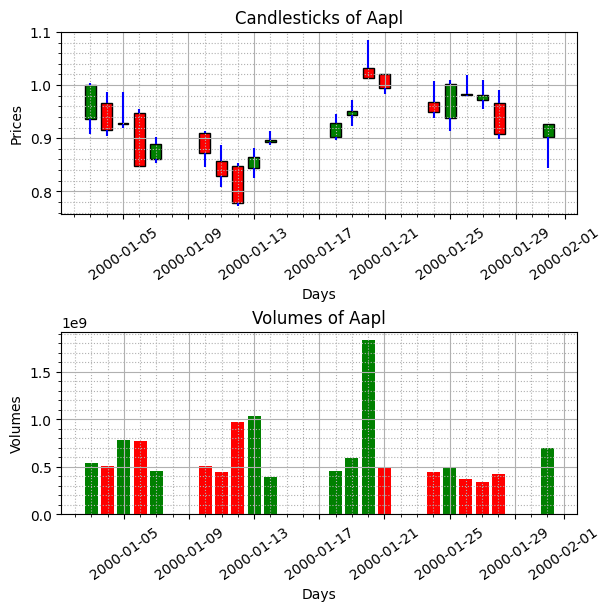

In [ ]:
plt.figure(figsize=(6, 6), layout='constrained')
# First subplot
plt.subplot(2, 1, 1)
for i in range(r1, r2+1):
    if C[i] < O[i]:
        opt = 'r'
    else:
        opt = 'g'
    mc.ChartItem(D[i], O[i], H[i], L[i], C[i], 'candle', opt)
mc.EndChart(Xlabel='Days', Ylabel='Prices', Title='Candlesticks of Aapl')
# Second subplot
plt.subplot(2, 1, 2)
for i in range(r1, r2+1):
    if i == 0:
        opt = 'b'
    elif C[i] < C[i-1]:
        opt = 'r'
    elif C[i] > C[i-1]:
        opt = 'g'
    else:
        opt = 'b'
    plt.bar(D[i], V[i], color=opt)
mc.EndChart(Xlabel='Days', Ylabel='Volumes', Title='Volumes of Aapl')
#
plt.show()

## Determinazione nuove funzioni

In [ ]:
def PlotVolumes(D, C, V, d1, d2):
    rows = FindRows(D, d1, d2)
    r1 = rows[0]
    r2 = rows[-1]
    for i in range(r1, r2+1):
        if i == 0:
            opt = 'b'
        elif C[i] < C[i-1]:
            opt = 'r'
        elif C[i] > C[i-1]:
            opt = 'g'
        else:
            opt = 'b'
        plt.bar(D[i], V[i], color=opt)


def PlotCandles(D, O, H, L, C, d1, d2):
    rows = FindRows(D, d1, d2)
    r1 = rows[0]
    r2 = rows[-1]
    for i in range(r1, r2+1):
        if C[i] < O[i]:
            opt = 'r'
        else:
            opt = 'g'
        mc.ChartItem(D[i], O[i], H[i], L[i], C[i], 'candle', opt)

## Grafico con uso di funzioni

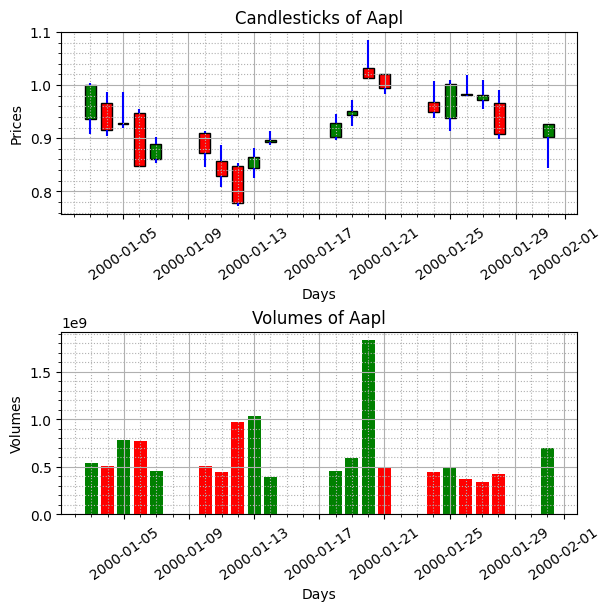

In [ ]:
plt.figure(figsize=(6, 6), layout='constrained')
# First subplot
plt.subplot(2, 1, 1)
PlotCandles(D, O, H, L, C, day1, day2)
mc.EndChart(Xlabel='Days', Ylabel='Prices', Title='Candlesticks of Aapl')
# Second subplot
plt.subplot(2, 1, 2)
PlotVolumes(D, C, V, day1, day2)
mc.EndChart(Xlabel='Days', Ylabel='Volumes', Title='Volumes of Aapl')
#
plt.show()